## Learning objectives

Last week, we learned:
- Pandas is a library in Python that is designed for data manipulation and analysis
- How to use libraries (import them, access their functions and data structures with `library.function_name()`)
- About the `dataframe` data structure: basically a smart spreadsheet, with rows of observations, and columns of variables/data for each observation - sort of a cross between a list (sortable, indexable) and a dictionary (quickly access data by key)
- Some basic operations: constructing a dataframe, summarizing, subsetting, reshaping

This week, we'll learn a bit more about summarization:
- Use `.value_counts()` to summarize categorical data
- Use `crosstab` to summarize categorical data cross multiple columns

And more advanced operations for reshaping/modifying your dataframe:
- Use `.apply()` to apply functions to one or more columns to generate new columns
- Use `.groupby()` to split your data into subgroups, apply some function to their data, then combine them into a new dataframe for further analysis (the "**split-apply-combine**" pattern that is fundamental to data analysis with pandas)
- Use some basic plotting functions to explore your data

I'll then tie it all together to show how they map to problem formulations for your Project 4: all the projects ahve the same basic structure! Only Problem 4 is a fair bit harder than the rest, which is why I'd like to convert it to extra credit.

These roughly correspond to Qs 6-8 in your PCEs.

The files we'll be working with in this session are the datasets we're giving for Project 4.

In [2]:
import pandas as pd
folder = '../Project 4 Datasets/'
file = f'{folder}/testudo_fall2020.csv'
courses = pd.read_csv(file) # read in the file into a dataframe called courses
courses.head() # use the .head() function to show the top 5 rows in the dataframe

,code,title,description,prereqs,credits,prereq_type,area
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST
3,AMST418N,Asian American Public Policy,,None,3,None,AMST
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST


In [ ]:
courses.describe() # quick summary for quantitative data

,credits
count,414.000000
mean,2.992754
std,0.390499
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,5.000000


## Use `.value_counts()` to summarize categorical data in your dataframe

Another way to get a summary of one or more columns that are *categorical*

*Hint: this could be useful for Problem 4 for Project 4!*

In [5]:
# access the area column in the courses dataframe
# and apply the value_counts method to that column, which is a series data structure
courses['area'].value_counts()

ECON    64
BMGT    53
MATH    49
INST    47
CMSC    46
PSYC    38
COMM    31
PLCY    28
STAT    15
AMST     9
SPHL     7
URSP     7
ENSP     6
INFM     5
PHSC     5
ENTS     4
Name: area, dtype: int64

In [18]:
ncaa = pd.read_csv(f'{folder}/ncaa-team-data.csv')
ncaa.head()

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,pts_total,ap_pre,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year
0,air-force,MWC,1,12.0,21.0,0.364,-2.99,1.08,73.1,75.1,148.2,30.0,30.0,30.0,-2.0,NaN,0.0,2016-17,Dave Pilipovich (12-21),2016.0
1,air-force,MWC,2,14.0,18.0,0.438,-5.51,0.66,68.4,72.8,141.2,30.0,30.0,30.0,-4.4,NaN,0.0,2015-16,Dave Pilipovich (14-18),2015.0
2,air-force,MWC,3,14.0,17.0,0.452,-1.85,-0.71,65.7,65.1,130.8,30.0,30.0,30.0,0.6,NaN,0.0,2014-15,Dave Pilipovich (14-17),2014.0
3,air-force,MWC,4,12.0,18.0,0.400,-4.08,1.71,66.0,69.1,135.1,30.0,30.0,30.0,-3.1,NaN,0.0,2013-14,Dave Pilipovich (12-18),2013.0
4,air-force,MWC,5,18.0,14.0,0.563,4.18,4.28,70.0,67.8,137.8,30.0,30.0,30.0,2.2,NaN,0.0,2012-13,Dave Pilipovich (18-14),2012.0


In [17]:
ncaa['conf'].value_counts()

Ind         5853
Southern    1146
Big Ten     1035
SEC          971
MVC          899
            ... 
Mid-3         13
NJNY7         12
North CA      10
AWC            8
ECBL           8
Name: conf, Length: 73, dtype: int64

In [10]:
area_counts = courses['area'].value_counts()
# like a cross between a dictionary anda  list
# can get value by named key like a dict
print("INST", area_counts['INST'])
print("most frqeuent item count", area_counts[0])

INST 47
most frqeuent item count 64


In [13]:
area_counts.keys()

Index(['ECON', 'BMGT', 'MATH', 'INST', 'CMSC', 'PSYC', 'COMM', 'PLCY', 'STAT',
       'AMST', 'SPHL', 'URSP', 'ENSP', 'INFM', 'PHSC', 'ENTS'],
      dtype='object')

In [14]:
# let's say we want the top 5 most populous areas
# we can slice/subset the series just like a list
# and then get the keys from that subset
area_counts[:5].keys()

Index(['ECON', 'BMGT', 'MATH', 'INST', 'CMSC'], dtype='object')

In [15]:
# let's try with the other datasets!
# ncaa-team-data
# bls-by-category
# BreadBasket_DMS
bread = pd.read_csv(f'{folder}/BreadBasket_DMS.csv')
bread.head()

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam


In [16]:
# how do we get the frequency counts for items in the bread dataframe?
bread['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: Item, Length: 95, dtype: int64

## Use `crosstabs()` to summarize categorical data across multiple columns 

In [23]:
def get_coach_name(x):
    els = x.split()
    name = " ".join(els[0:-1])
    return name

ncaa['coach_name'] = ncaa['coaches'].apply(get_coach_name)
ncaa.head()

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,...,ap_pre,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year,coach_name
0,air-force,MWC,1,12.0,21.0,0.364,-2.99,1.08,73.1,75.1,...,30.0,30.0,30.0,-2.0,NaN,0.0,2016-17,Dave Pilipovich (12-21),2016.0,Dave Pilipovich
1,air-force,MWC,2,14.0,18.0,0.438,-5.51,0.66,68.4,72.8,...,30.0,30.0,30.0,-4.4,NaN,0.0,2015-16,Dave Pilipovich (14-18),2015.0,Dave Pilipovich
2,air-force,MWC,3,14.0,17.0,0.452,-1.85,-0.71,65.7,65.1,...,30.0,30.0,30.0,0.6,NaN,0.0,2014-15,Dave Pilipovich (14-17),2014.0,Dave Pilipovich
3,air-force,MWC,4,12.0,18.0,0.400,-4.08,1.71,66.0,69.1,...,30.0,30.0,30.0,-3.1,NaN,0.0,2013-14,Dave Pilipovich (12-18),2013.0,Dave Pilipovich
4,air-force,MWC,5,18.0,14.0,0.563,4.18,4.28,70.0,67.8,...,30.0,30.0,30.0,2.2,NaN,0.0,2012-13,Dave Pilipovich (18-14),2012.0,Dave Pilipovich


In [25]:
coach_results = pd.crosstab(ncaa['coach_name'], ncaa['ncaa_result'])
coach_results

ncaa_result,Lost First Four,Lost First Round,Lost National Final,Lost National Semifinal,Lost Opening Round,Lost Regional Final,Lost Regional Final (Final Four),Lost Regional Semifinal,Lost Second Round,Lost Third Round,Playing First Four,Playing First Round,Won National Final
coach_name,,,,,,,,,,,,,
A.B. Williamson,0,1,0,0,0,0,0,0,0,0,0,0,0
Abe Lemons,0,3,0,0,0,2,0,2,1,0,0,0,0
Adolph Rupp,0,0,1,0,0,7,2,6,0,0,0,0,4
Al Brown,0,1,0,0,0,0,0,0,0,0,0,0,0
Al Duer,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whack Hyder,0,0,0,0,0,1,0,0,0,0,0,0,0
Will Wade,0,0,0,0,0,0,0,0,1,0,0,1,0
William Donovan,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
def is_intro(x):
    if "Introduction" in x:
        return 1
    else:
        return 0

# apply the is_intro function to the title column in courses
# and save the results in the is_intro column in courses
courses['is_intro'] = courses['title'].apply(is_intro)

# show me the top 5 rows in the dataframe
courses.head()

,code,title,description,prereqs,credits,prereq_type,area,is_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,0


In [29]:
# let's say we want to know how many intro classes by area
intro_by_area = pd.crosstab(courses["area"], courses["is_intro"])
intro_by_area

is_intro,0,1
area,,
AMST,6,3
BMGT,51,2
CMSC,36,10
COMM,31,0
ECON,63,1
ENSP,4,2
ENTS,4,0
INFM,4,1
INST,40,7


Reset index if you want the "area" information to be usable for analysis/plotting/etc.

In [48]:
intro_by_area = intro_by_area.reset_index()
intro_by_area

is_intro,area,0,1
0,AMST,6,3
1,BMGT,51,2
2,CMSC,36,10
3,COMM,31,0
4,ECON,63,1
5,ENSP,4,2
6,ENTS,4,0
7,INFM,4,1
8,INST,40,7
9,MATH,40,9


## Computing data based on one or more columns using `.apply()`

More advanced operations on dataframes involve modifying or creating new columns!

In data analysis, we often want to do things to data in our columns for data preparation/cleaning. Sometimes there is missing data we want to recode, or we want to redescribe data or reclassify it for our analysis. We can do this with a combination of functions and the `apply()` method.

### `.apply()` with a single column

Let's say we want to have a prereqs column that is sortable, maybe 0 = No prereqs, and 1 = has prereqs

#### Step 1: Define the function you want to apply

In [33]:
# Step 1: define the function you want to apply
def has_prereq(prereq_descr):
  # assume we get a string prereq description
  if "None" in prereq_descr:
    return 0
  else:
    return 1

In [34]:
# test the function
prereq = "BMGT301; or instructor permission" # this should yield 1
prereq2 = "None" # this should yield 0
print(has_prereq(prereq))
print(has_prereq(prereq2))

1
0


#### Step 2: Apply the function to a column

In [35]:
# Step 2: apply it to one or more columns
courses['has_prereqs'] = courses['prereqs'].apply(has_prereq) # apply the has_prereq() function to every row in the prereqs column in the courses data frame
courses.head(10)

,code,title,description,prereqs,credits,prereq_type,area,is_intro,has_prereqs
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,1,0
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,1,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,0,1
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,None,AMST,0,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,None,AMST,0,0
7,AMST856,Museum Research Seminar,A research seminar focusing on the practice a...,"AMST655, ANTH655, or HIST610.",3,Flexible,AMST,0,1
8,AMST857,Museum Scholarship Practicum,Students devise and carry out a research prog...,"AMST856, ANTH856, or HIST810.",3,Flexible,AMST,0,1
9,BMGT190H,Introduction to Design and Quality,QUEST students learn and apply design practic...,None,4,None,BMGT,1,0


In [37]:
pd.crosstab(courses['is_intro'], courses['has_prereqs'])

has_prereqs,0,1
is_intro,,
0,91,280
1,11,32


In [39]:
courses[(courses['is_intro']==1) & (courses['has_prereqs']==1)]

,code,title,description,prereqs,credits,prereq_type,area,is_intro,has_prereqs
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
25,BMGT392,Introduction to International Business Manage...,A study of the domestic and foreign environme...,ECON200.,3,Hard,BMGT,1,1
66,CMSC216,Introduction to Computer Systems,Introduction to the interaction between user ...,Minimum grade of C- in CMSC132; and minimum g...,4,Hard,CMSC,1,1
68,CMSC320,Introduction to Data Science,"An introduction to the data science pipeline,...",Minimum grade of C- in CMSC216 and CMSC250.,3,Hard,CMSC,1,1
77,CMSC421,Introduction to Artificial Intelligence,Introduces a range of ideas and methods in AI...,Minimum grade of C- in CMSC351 and CMSC330; a...,3,Flexible,CMSC,1,1
78,CMSC422,Introduction to Machine Learning,Machine Learning studies representations and ...,"Minimum grade of C- in CMSC320, CMSC330, and ...",3,Hard,CMSC,1,1
83,CMSC430,Introduction to Compilers,"Topics include lexical analysis, parsing, int...",Minimum grade of C- in CMSC330 and CMSC351; a...,3,Flexible,CMSC,1,1
85,CMSC434,Introduction to Human-Computer Interaction,Assess usability by quantitative and qualitat...,Minimum grade of C- in CMSC330 and CMSC351; a...,3,Flexible,CMSC,1,1
92,CMSC457,Introduction to Quantum Computing,An introduction to the concept of a quantum c...,1 course with a minimum grade of C- from (MAT...,3,Hard,CMSC,1,1
94,CMSC466,Introduction to Numerical Analysis I,"Floating point computations, direct methods f...",1 course with a minimum grade of C- from (MAT...,3,Hard,CMSC,1,1


In [5]:
def has_intro(descr):
    if "intro" in descr.lower():
        return 1
    else:
        return 0

courses['has_intro'] = courses['description'].apply(has_intro)
courses.head(10)

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,None,AMST,0,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,None,AMST,0,0
7,AMST856,Museum Research Seminar,A research seminar focusing on the practice a...,"AMST655, ANTH655, or HIST610.",3,Flexible,AMST,1,0
8,AMST857,Museum Scholarship Practicum,Students devise and carry out a research prog...,"AMST856, ANTH856, or HIST810.",3,Flexible,AMST,1,0
9,BMGT190H,Introduction to Design and Quality,QUEST students learn and apply design practic...,None,4,None,BMGT,0,0


If you're lazy, you can pass in anonymous functions too, with `lambda`: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

#### What's happening under the hood

In [ ]:
courses.head()

,code,title,description,prereqs,credits
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3
3,AMST418N,Asian American Public Policy,,None,3
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3


As another example, let's say I want to know how many courses we have in each area. We don't have that data in the dataset; at least not explicitly. Fortunately we can make it with some simple programming that you already know how to do! The problem here is, given a code (i.e., data from one column), how do we "extract" the area?

In [6]:
# Step 1: define the function
def extract_area(code):
    # heuristic: just grab the first four characters
    return code[:4]

In [ ]:
c = "CMSC250"
extract_area(c)

'CMSC'

Let's see how this works!

The `.apply()` function generates a list that is the same length as the input column's number of rows, with a corresponding value for each input (in this case, we have 414 area codes in the output "list")

In [7]:
# Step 2: apply the function
courses['area'] = courses['code'].apply(extract_area)
courses.head(10)

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,None,AMST,0,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,None,AMST,0,0
7,AMST856,Museum Research Seminar,A research seminar focusing on the practice a...,"AMST655, ANTH655, or HIST610.",3,Flexible,AMST,1,0
8,AMST857,Museum Scholarship Practicum,Students devise and carry out a research prog...,"AMST856, ANTH856, or HIST810.",3,Flexible,AMST,1,0
9,BMGT190H,Introduction to Design and Quality,QUEST students learn and apply design practic...,None,4,None,BMGT,0,0


In [3]:
# the bread dataset
bread = pd.read_csv(f"{folder}/BreadBasket_DMS.csv")

In [4]:
def extract_hour(time):
    return int(time.split(":")[0])

bread['Hour'] = bread['Time'].apply(extract_hour)
bread.sort_values(by="Hour")

,Date,Time,Transaction,Item,Hour
8561,1/1/2017,1:21:05,4090,Bread,1
903,11/4/2016,7:32:33,437,Medialuna,7
711,11/3/2016,7:50:50,341,Medialuna,7
4688,11/28/2016,7:44:17,2217,Coffee,7
4689,11/28/2016,7:44:17,2217,Bread,7
...,...,...,...,...,...
21215,4/8/2017,22:43:06,9640,Vegan Feast,22
21218,4/8/2017,22:48:52,9643,Vegan Feast,22
14123,2/14/2017,23:29:03,6588,Valentine's card,23
14124,2/14/2017,23:38:41,6589,Valentine's card,23


Here's another view of what's going on, with syntax you're a bit more familiar with.

In [ ]:
# show what's happening inside, basically applying to each row
for prereq in courses['prereqs'].values[:10]:
    print("Prereq is...", prereq)
    val = has_prereq(prereq)
    print("Has prereq = ", val, "\n")

Prereq is...  PSYC100; and must have completed 3 additional credits in PSYC courses. Or permission of BSOS-Psychology department.  
Has prereq =  1 

Prereq is...  None 
Has prereq =  0 

Prereq is...  None 
Has prereq =  0 

Prereq is...  Must have admission into Computer Science Departmental Honors Program.   
Has prereq =  1 

Prereq is...  1 course with a minimum grade of C- from (MATH136, MATH140). 
Has prereq =  1 

Prereq is...  COMM719, COMM769, and COMM729; and admissions test for second-year courses; and permission of ARHU-Communication department. 
Has prereq =  1 

Prereq is...  Admissions test for second year courses; and (COMM659 and COMM679); and permission of ARHU-Communication department. 
Has prereq =  1 

Prereq is...  None 
Has prereq =  0 

Prereq is...  Must have completed SPHL601; or permission of instructor.   
Has prereq =  1 

Prereq is...  None 
Has prereq =  0 



#### Step 3: Save the resulting data from the `.apply()` into a new/existing column

What if we want to save the results so we can use it later? We can simply assign it to a column, new or existing. Remember, pandas prefers immutability in general (return a new object instead of modifying the object), and sometimes enforces it. With apply, it's enforced: you can't do it in place, you have to assign the returned series to a new variable if you want it to persist. To see this, notice that when we print out hte dataframe again, we don't see changes to the code or any trace of what we did in the dataframe.

In [ ]:
courses.head()

,code,title,description,prereqs,credits,has_prereq
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,0
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,1
3,AMST418N,Asian American Public Policy,,None,3,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,1


Let's now save it by assigning it to a new column in the dataframe

*Side note: you can do this with [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) as well, but that's not pandas style. I show the syntax below, but unpacking it would be a distraction for now I think.*

In [8]:
# apply the extract area function to every row in the courses 'code' column, then assign the resulting set of rows to the 'area' column in the courses dataframe
courses['area'] = courses['code'].apply(extract_area)
# list comprehension style
# courses['area'] = [extract_area(c) for c in courses['code']]
courses.head()

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0


Now that new column is available for analysis!

Let's do another one to see how it works! Another thing we might want to know is whether or not a course is introductory. Here, we can do a simple thing of checking if the keyword "introduction" is in the course title.

In [9]:
def is_intro(title):
    if "intro" in title.lower():
        return 1
    else:
        return 0

courses['is_intro'] = courses['title'].apply(is_intro)
courses.head()

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro,is_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,0,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0,0


In [ ]:
courses[courses['is_intro']==1]

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro,is_intro
273,MATH206,Introduction to Matlab,This course is intended to prepare students f...,1 course with a minimum grade of C- from (MAT...,1,Hard,MATH,1,0,1
291,MATH416,Applied Harmonic Analysis: An Introduction to...,Introduces students to the mathematical conce...,Minimum grade of C- in MATH141; and 1 course ...,3,Hard,MATH,1,1,1
265,MATH107,Introduction to Math Modeling and Probability,A goal is to convey the power of mathematics ...,Must have math eligibility of Math 107 or hig...,3,Flexible,MATH,1,1,1
288,MATH406,Introduction to Number Theory,"Integers, divisibility, prime numbers, unique...",1 course with a minimum grade of C- from (MAT...,3,Flexible,MATH,1,0,1
285,MATH403,Introduction to Abstract Algebra,"Integers; groups, rings, integral domains, fi...",1 course with a minimum grade of C- from (MAT...,3,Flexible,MATH,1,0,1
293,MATH424,Introduction to the Mathematics of Finance,Introduction to the mathematical models used ...,Minimum grade of C- in MATH141; and 1 course ...,3,Hard,MATH,1,1,1
281,MATH314,"Introduction to Probability, Data, Analysis a...","Analysis of bivariate data, probability and r...",MATH214.,3,Hard,MATH,1,0,1
255,INST737,Introduction to Data Science,An exploration of some of the best and most g...,"INST627; and (LBSC690, LBSC671, or INFM603). ...",3,Flexible,INST,1,0,1
279,MATH310,Introduction to Mathematical Proof,To develop the students' ability to construct...,Minimum grade of C- in MATH141; and must have...,3,Flexible,MATH,1,0,1
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1,1


### `.apply()` with data from multiple columns

What if you want to have a way to filter the courses in terms of "easy entry points" (i.e., both introductory *and* has no prerequisites)? That might also be interesting to analyze by area to see how many departments offer these easy entry points into the department for students from other departments.

Core thing we need to know here is that our `.apply()` will now apply a function that has a **row** as input, not an element of a single column. That way, we can access data from any column in the row: in this case, data from the "is_intro" and "has_prereq" columns.

We tell `.apply()` to do this with the `axis` parameter. We need to pass the argument `1` to the axis parameter when we call `.apply()` so it knows to pass a row into the function, not just a single column element. See here for more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [43]:
# is_entry_point function
def is_entry_point(row):
  # if the value of the "is intro" column for this row is 1
  # AND the value of hte "has_prereq" column for this row is 0
  # return 1
  if row['is_intro'] == 1 and row['has_prereqs'] == 0: 
    return 1
  else:
    return 0

In [44]:
# this should yield 1
test_row = {
    'is_intro': 1,
    'has_prereqs': 0
}

# this should yield 0
test_row2 = {
    'is_intro': 1,
    'has_prereqs': 1
}

print(is_entry_point(test_row))
print(is_entry_point(test_row2))

1
0


In [45]:
# Step 2 apply the function and save the result
courses['is_entrypoint'] = courses.apply(is_entry_point, axis=1) # need to specify axis=1 to apply it to every row
courses['classlevel'] = courses['classcode'].apply(level)
courses.head()

# compare to .apply() with a single column
# courses['is_intro'] = courses['title'].apply(is_intro)
# key differences:
# - here for multiple columns, we start with the whole dataframe, instead of a specific column
# - and we pass the argument 1 to the axis parameter instead of letting it use the default 0 value

,code,title,description,prereqs,credits,prereq_type,area,is_intro,has_prereqs,is_entrypoint
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,1,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,1,0,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1,0
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,0,1,0


In [ ]:
courses[courses['is_entrypoint'] == 1]

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,has_intro,is_intro,is_entrypoint
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1,1,1
220,INST201,Introduction to Information Science,Examining the effects of new information tech...,None,3,None,INST,0,0,1,1
248,INST644,Introduction to Digital Humanities,"A survey of the history, methods, and princip...",None,3,None,INST,0,0,1,1
246,INST630,Introduction to Programming for the Informati...,An introduction to computer programming inten...,None,3,None,INST,0,1,1,1
241,INST604,Introduction to Archives and Digital Curation,"Overview of the principles, practices, and ap...",None,3,None,INST,0,0,1,1
373,PSYC603,Introduction to Industrial and Organizational...,Advanced survey of industrial-organizational ...,None,3,None,PSYC,0,0,1,1
206,ENSP330,Introduction to Environmental Law,"An overview of environmental law, from its co...",None,3,None,ENSP,0,0,1,1
62,CMSC122,Introduction to Computer Programming via the ...,Introduction to computer programming in the c...,None,3,None,CMSC,0,1,1,1
203,ENSP102,Introduction to Environmental Policy,Second of two courses that introduce students...,None,3,None,ENSP,0,1,1,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,0,1,1


In [ ]:
(courses['has_prereq'] == 0) & (courses['is_intro'] == 1)

0       True
1       True
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [ ]:
# show me all the courses that are intro and have no prereqs
courses[courses['is_entrypoint'] == 1]
# if we have a list, we can do indexing like this to get the first 4 elements, say: courses[:4]
# if we have a dictionary, we can retrieve base don key, like this courses['hello']

,code,title,description,prereqs,credits,has_prereq,area,is_intro,is_entrypoint
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,1,AMST,1,0
3,AMST418N,Asian American Public Policy,,None,3,0,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,1,AMST,0,0
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,0,AMST,0,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,0,AMST,0,0
...,...,...,...,...,...,...,...,...,...
409,URSP604,The Planning Process,Legal framework for U.S. planning; approaches...,None,3,0,URSP,0,0
410,URSP606,Planning Economics,"Resource allocation in a market economy, the ...",None,3,0,URSP,0,0
411,URSP631,Transportation and Land Use,The interrelationship between transportation ...,None,3,0,URSP,0,0
412,URSP661,City and Regional Economic Development Planning,Spatial patterns of employment and population...,URSP606 or URSP660.,3,1,URSP,0,0


More examples?

In [50]:
# make a column that is 1 if you had a winning season AND reached the round of 32
def doing_ok(row):
    if row['ncaa_numeric'] <= 32 and row['wl'] > .5 and row['ncaa_numeric'] != 0:
        return 1
    else:
        return 0

ncaa['doing_ok'] = ncaa.apply(doing_ok, axis=1)
ncaa.head()

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,...,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year,coach_name,doing_ok
0,air-force,MWC,1,12.0,21.0,0.364,-2.99,1.08,73.1,75.1,...,30.0,30.0,-2.0,NaN,0.0,2016-17,Dave Pilipovich (12-21),2016.0,Dave Pilipovich,0
1,air-force,MWC,2,14.0,18.0,0.438,-5.51,0.66,68.4,72.8,...,30.0,30.0,-4.4,NaN,0.0,2015-16,Dave Pilipovich (14-18),2015.0,Dave Pilipovich,0
2,air-force,MWC,3,14.0,17.0,0.452,-1.85,-0.71,65.7,65.1,...,30.0,30.0,0.6,NaN,0.0,2014-15,Dave Pilipovich (14-17),2014.0,Dave Pilipovich,0
3,air-force,MWC,4,12.0,18.0,0.400,-4.08,1.71,66.0,69.1,...,30.0,30.0,-3.1,NaN,0.0,2013-14,Dave Pilipovich (12-18),2013.0,Dave Pilipovich,0
4,air-force,MWC,5,18.0,14.0,0.563,4.18,4.28,70.0,67.8,...,30.0,30.0,2.2,NaN,0.0,2012-13,Dave Pilipovich (18-14),2012.0,Dave Pilipovich,0


In [54]:
# create a column taht is 1 if the pt differential is non-negative BUT the team didn't make the playoffs (numeric >= 32 or 0)
def underperforming(row):
    if row['pts_diff'] >= 0 and row['ncaa_numeric'] <= 32 and row['ncaa_numeric'] != 0:
        return 1
    else:
        return 0

ncaa['underperforming'] = ncaa.apply(underperforming, axis=1)
ncaa[ncaa['underperforming']==1]

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,...,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year,coach_name,doing_ok,underperforming
11,air-force,MWC,12,24.0,7.0,0.774,10.20,2.49,64.2,54.7,...,30.0,9.5,Lost First Round,1.0,2005-06,Jeff Bzdelik (24-7),2005.0,Jeff Bzdelik,1,1
13,air-force,MWC,14,22.0,7.0,0.759,9.12,0.08,59.9,50.9,...,30.0,9.0,Lost First Round,1.0,2003-04,Joe Scott (22-7),2003.0,Joe Scott,1,1
64,akron,MAC,5,26.0,7.0,0.788,8.11,0.18,71.8,62.8,...,30.0,9.0,Lost Second Round,2.0,2012-13,Keith Dambrot (26-7),2012.0,Keith Dambrot,1,1
66,akron,MAC,7,23.0,13.0,0.639,2.15,-1.02,70.1,65.7,...,30.0,4.4,Lost Second Round,2.0,2010-11,Keith Dambrot (23-13),2010.0,Keith Dambrot,1,1
68,akron,MAC,9,23.0,13.0,0.639,3.37,-2.01,66.8,60.3,...,30.0,6.5,Lost First Round,1.0,2008-09,Keith Dambrot (23-13),2008.0,Keith Dambrot,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23790,xavier,A-10,17,21.0,8.0,0.724,12.14,4.59,73.4,65.9,...,30.0,7.5,Lost First Round,1.0,2000-01,Skip Prosser (21-8),2000.0,Skip Prosser,1,1
23793,xavier,A-10,20,22.0,8.0,0.733,19.46,4.76,83.5,68.8,...,23.0,14.7,Lost First Round,1.0,1997-98,Skip Prosser (22-8),1997.0,Skip Prosser,1,1
23794,xavier,A-10,21,23.0,6.0,0.793,16.14,5.28,83.2,72.3,...,13.0,10.9,Lost Second Round,2.0,1996-97,Skip Prosser (23-6),1996.0,Skip Prosser,1,1
23871,yale,Ivy,2,23.0,7.0,0.767,9.08,-1.03,74.9,63.8,...,30.0,11.1,Lost Second Round,2.0,2015-16,James Jones (23-7),2015.0,James Jones,1,1


In [55]:
# extract the month column from the breadbasket date column and save it
bread.head()

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam


In [58]:
date = "10/30/2016"
def get_month(date):
    mm, dd, yy = date.split("/")
    return mm

In [60]:
# apply the get_month function to every value in the Date column in bread
# and store the resulting series in the Month column
bread['Month'] = bread['Date'].apply(get_month)
bread.head()

,Date,Time,Transaction,Item,Month
0,10/30/2016,9:58:11,1,Bread,10
1,10/30/2016,10:05:34,2,Scandinavian,10
2,10/30/2016,10:05:34,2,Scandinavian,10
3,10/30/2016,10:07:57,3,Hot chocolate,10
4,10/30/2016,10:07:57,3,Jam,10


## The split-apply-combine pattern (with `.groupby()`)

Going more deeply on the path of "reshaping", we often want to compute data based on subsets of the data, grouped by some column.

For example, we might want to see how many departments offer easy entry points. 

We can do this with the "split-apply-combine" pattern, which is implemented in the `.groupby()` function.

Basically, it goes like this:
1. **Split** the data into subgroups (e.g., split courses into department subgroups)
2. **Apply** some computation on each subgroup (e.g., find number of easy entry points for each department subgroup)
3. **Combine** subgroup-computation information into an overall new dataframe that has subgroups as entries

Let's first look at this tutorial together to get a feel for how it works: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [63]:
for area, areaData in courses.groupby('area'):
    print(area)
    print(areaData)

AMST
        code                                              title  \
0   AMST101                      Introduction American Studies    
1  AMST298C             Introduction to Asian American Studies    
2   AMST340    Introduction to History, Theories and Methods...   
3  AMST418N                       Asian American Public Policy    
4   AMST450                        Seminar in American Studies    
5  AMST498J                            Asian American Politics    
6   AMST603             Current Approaches to American Studies    
7   AMST856                            Museum Research Seminar    
8   AMST857                       Museum Scholarship Practicum    

                                         description  \
0   Introduces students to the interdisciplinary ...   
1   The aggregate experience of Asian Pacific Ame...   
2   Introduction to the process of interdisciplin...   
3                                                      
4   Developments in theories and methods of 

### Split with `.groupby()`

The manual way

In [ ]:
# get all the unique area values
course_areas = set(courses['area'].values)

# iterate through each unique area value
for area in course_areas:
    print(area)
    # get the subset of the course data that is associated with this area
    area_df = courses[courses['area'] == area]
    print(area_df.head())
    # summarize the credits for this subset of hte dataframe
    print(area_df['credits'].mean())
    print("\n")

CMSC
          code  ... is_entrypoint
107   CMSC800   ...             0
71   CMSC396H   ...             0
65    CMSC133   ...             0
78    CMSC422   ...             0
77    CMSC421   ...             0

[5 rows x 11 columns]
3.0


INFM
         code  ... is_entrypoint
217  INFM737   ...             0
215  INFM620   ...             0
214  INFM612   ...             0
213  INFM605   ...             0
216  INFM700   ...             0

[5 rows x 11 columns]
3.0


BMGT
         code  ... is_entrypoint
60  BMGT494H   ...             0
59   BMGT491   ...             0
57   BMGT485   ...             0
56   BMGT484   ...             0
55   BMGT476   ...             0

[5 rows x 11 columns]
3.0377358490566038


STAT
         code                           title  ... is_intro is_entrypoint
406  STAT741    Linear Statistical Models II   ...        0             0
405  STAT730            Time Series Analysis   ...        0             0
404  STAT701      Mathematical Statistics II   ...      

The `.groupby()` way

In [21]:
# use groupby to split the courses df into subsets grouped by area
# we can iterate through the resulting collection of dataframe subsets
# where each step in the iteration allows us to grab 
# 1. the name of the subset, which is the shared value (in this case area)
# 2. the subset dataframe (here called areaDF)
for area, areaDF in courses.groupby('area'):
    print(area)
    print(areaDF.head())
    print(areaDF['credits'].mean()) # starting to get into the "apply"

AMST
        code  ... is_entrypoint
0   AMST101   ...             1
1  AMST298C   ...             1
2   AMST340   ...             0
3  AMST418N   ...             0
4   AMST450   ...             0

[5 rows x 11 columns]
3.0
BMGT
         code  ... is_entrypoint
9   BMGT190H   ...             1
10   BMGT210   ...             0
11   BMGT302   ...             0
12   BMGT310   ...             0
13   BMGT311   ...             0

[5 rows x 11 columns]
3.0377358490566038
CMSC
        code  ... is_entrypoint
62  CMSC122   ...             1
63  CMSC131   ...             0
64  CMSC132   ...             0
65  CMSC133   ...             0
66  CMSC216   ...             0

[5 rows x 11 columns]
3.0
COMM
         code  ... is_entrypoint
108  COMM200   ...             0
109  COMM331   ...             0
110  COMM332   ...             0
111  COMM351   ...             0
112  COMM353   ...             0

[5 rows x 11 columns]
2.870967741935484
ECON
         code  ... is_entrypoint
139  ECON200   ...       

In [66]:
courses.head()

,code,title,description,prereqs,credits,prereq_type,area,is_intro,has_prereqs,is_entrypoint
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,1,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,1,0,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1,0
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,0,1,0


### Apply and Combine

The "manual" way: apply and combine into a new dataframe we construct from scratch

In [32]:
# create an empty list to hold the new rows of the new COMBINED dataframe
eba = []
# SPLIT the dataframe by area, and iterate through each split
for area, areaData in courses.groupby('area'): 
  
    # APPLY operations on the dataframe split
    # count the number of entry point courses in the subarea
    num_entrypoints = areaData['is_entrypoint'].sum()
    
    # count the number of total courses in the subarea
    num_classes = len(areaData)
    
    # get all prereq classes
    prereq_classes = []
    for prereq_descr in areaData[areaData['has_prereqs'] == 1]['prereqs'].values:
        # extract the prereq classes
        prereqs = extract_prereqs(prereq_descr)
        # add to running list
        for p in prereqs:
            if p not in prereq_classes:
                prereq_classes.append(p)
    
    # count number of ujnique prereq classses
    num_unique_prereqs = len(prereq_classes)

    # prepare a new row to put into the COMBINEd dataframe that has areas as rows instead of courses
    # the row is represented as a dictionary, where each key is a column
    entry = {
      'area': area, # each row is an area
      'num_entrypoints': num_entrypoints, 
      'num_classes': num_classes,
      'prereq_classes': prereq_classes,
      'num_unique_prereqs': num_unique_prereqs 
    }
    # COMBINE the resulting subcomputation into a new dataset
    eba.append(entry) 
# convert the list of new entries into a dataframe
eba = pd.DataFrame(eba)
eba

,area,num_entrypoints,num_classes,prereq_classes,num_unique_prereqs
0,AMST,2,9,"[AMST201, AMST340, AMST655, ANTH655, HIST610, ...",8
1,BMGT,1,53,"[BMGT301, BMGT221, BMGT310, BMGT201, BMGT231, ...",28
2,CMSC,1,46,"[CMSC131, MATH140, CMSC132, MATH141, CMSC216, ...",47
3,COMM,0,31,"[COMM201, JOUR181, COMM331, COMM332, COMM351, ...",14
4,ECON,0,64,"[MATH107, MATH110, MATH113, ECON200, ECON201, ...",37
5,ENSP,2,6,"[BIOM301, ECON321, GEOG306, PSYC200, SOCY201, ...",12
6,ENTS,0,4,[ENTS640],1
7,INFM,0,5,"[INFM612, LBSC631, INFM603, INFM736]",4
8,INST,4,47,"[MATH115, MATH140, STAT100, INST126, INST201, ...",38
9,MATH,0,49,"[MATH003, MATH113, MATH115, MATH112, MATH120, ...",43


In [72]:
# how many classes are in each area?
# make a data frame that summarizes it

# make a list to hold the combined data by subgroup
summarized = []

# SPLIT-APPLY-COMBINE
# SPLIT the dataset by area
for area, areaData in courses.groupby('area'):
    # APPLY a computation to get the number of courses
    # which is just the number of rows in this subset dataframe
    num_courses = len(areaData)
    entry = {
        'area': area,
        'num_courses': num_courses
    }
    # add it to the COMBINED summarized dataset
    summarized.append(entry)

# turn the list of dictionaries into a dataframe
summarized = pd.DataFrame(summarized)
summarized

,area,num_courses
0,AMST,9
1,BMGT,53
2,CMSC,46
3,COMM,31
4,ECON,64
5,ENSP,6
6,ENTS,4
7,INFM,5
8,INST,47
9,MATH,49


In [33]:
# iterate through the dataframe, row by row
for index, row in eba.iterrows():
    print(row['area'])
    print(row['prereq_classes'])

AMST
['AMST201', 'AMST340', 'AMST655', 'ANTH655', 'HIST610', 'AMST856', 'ANTH856', 'HIST810']
BMGT
['BMGT301', 'BMGT221', 'BMGT310', 'BMGT201', 'BMGT231', 'BMGT230', 'BMGT340', 'BMGT210', 'BMGT220', 'BMGT461', 'BMGT361', 'ECON200', 'BMGT402', 'BMGT403', 'BMGT311', 'BMGT430', 'BMGT332', 'MATH120', 'MATH140', 'MATH220', 'BMGT343', 'BMGT350', 'BMGT372', 'ENES390', 'BMGT390', 'BMGT190', 'ENES190', 'BMGT493']
CMSC
['CMSC131', 'MATH140', 'CMSC132', 'MATH141', 'CMSC216', 'CMSC250', 'CMSC330', 'CMSC351', 'CMSC414', 'CMSC417', 'CMSC420', 'CMSC430', 'CMSC433', 'CMSC435', 'ENEE440', 'ENEE457', 'CMSC320', 'MATH240', 'MATH461', 'CMSC412', 'STAT400', 'STAT410', 'CMSC106', 'ENEE150', 'ENEE324', 'ENEE380', 'PHYS274', 'PHYS373', 'MATH341', 'MATH241', 'MATH340', 'MATH246', 'MATH410', 'CMSC466', 'AMSC466', 'AMSC460', 'CMSC460', 'AMSC663', 'CMSC663', 'CMSC421', 'CMSC451', 'ENEE641', 'ENEE651', 'AMSC607', 'CMSC723', 'INST735', 'LING723']
COMM
['COMM201', 'JOUR181', 'COMM331', 'COMM332', 'COMM351', 'COMM250

We can define a whole new function that is much more complicated than a simple sum or mean, to APPLY to each subset of our SPLIT

For example, we can write a function that takes in a prereq description, and extracts all the prereq classes mentinoed in the description

In [67]:
def extract_prereqs(descr):
    prereqs = []
    for word in descr.split():
        # clean the word
        clean_word = ""
        for char in word:
            if char.isalpha() or char.isdigit():
                clean_word += char
        if len(clean_word) == 7 and clean_word[:4].isalpha() and clean_word[-3:].isdigit():
            prereqs.append(clean_word)
    return prereqs

In [68]:
for prereq_descr in courses[courses['has_prereqs'] == 1]['prereqs'].values:
    print(prereq_descr)
    print(extract_prereqs(prereq_descr))

 Must have completed AMST201; and 2 courses in AMST.  
['AMST201']
 AMST201 and AMST340; and 1 course in AMST.   
['AMST201', 'AMST340']
 AMST655, ANTH655, or HIST610.   
['AMST655', 'ANTH655', 'HIST610']
 AMST856, ANTH856, or HIST810.   
['AMST856', 'ANTH856', 'HIST810']
 BMGT301; or permission of BMGT-Robert H. Smith School of Business.   
['BMGT301']
 BMGT221. 
['BMGT221']
 BMGT310. 
['BMGT310']
 BMGT221. 
['BMGT221']
 BMGT221. 
['BMGT221']
 BMGT221; and (BMGT201 or BMGT301). 
['BMGT221', 'BMGT201', 'BMGT301']
 BMGT231 or BMGT230; or students who have taken courses with comparable content may contact the department. 
['BMGT231', 'BMGT230']
 BMGT340.   
['BMGT340']
 BMGT210 or BMGT220.   
['BMGT210', 'BMGT220']
 BMGT461 or BMGT361.  
['BMGT461', 'BMGT361']
 BMGT461 or BMGT361.   
['BMGT461', 'BMGT361']
 ECON200. 
['ECON200']
 BMGT301; or students who have taken courses with comparable content may contact the department.   
['BMGT301']
 BMGT301. 
['BMGT301']
 BMGT402 and BMGT403.   
[

#### Shortcut apply-combine with `.groupby()` + `.agg()`

To make `.groupby()` more powerful, we tack on the `.agg()` function to it to tell pandas to *aggregate* particular columns in particular ways (e.g., count the number of entry point courses in a given department, vs. give an average *proportion* of classes that are entry points).

In [34]:
# SPLIT by area
courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    # APPLY tehse computations and COMBINE into a new data frame using .agg
    num_entrypoints=('is_entrypoint', sum), 
    num_classes=('area', "count")
)

,area,num_entrypoints,num_classes
0,AMST,2,9
1,BMGT,1,53
2,CMSC,1,46
3,COMM,0,31
4,ECON,0,64
5,ENSP,2,6
6,ENTS,0,4
7,INFM,0,5
8,INST,4,47
9,MATH,0,49


Anatomy of combining `.groupby()` with `.agg()`

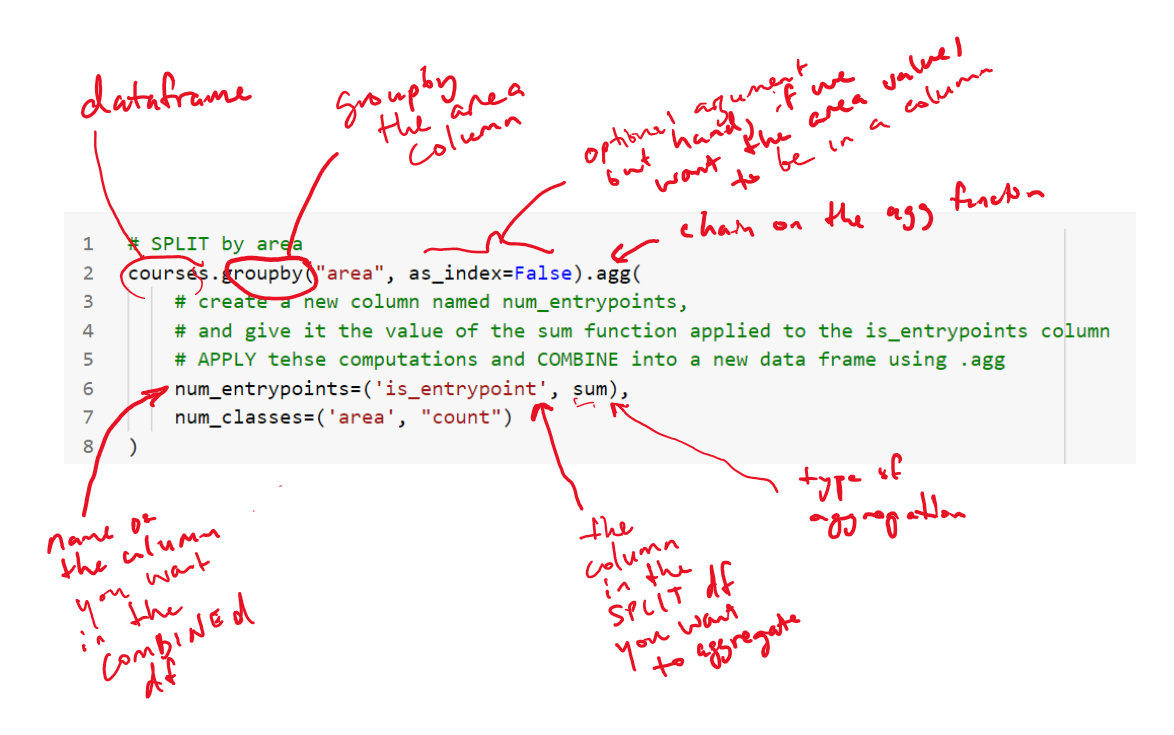

This pattern is explained in the section "Recommended: Tuple Named Aggregations" in this article: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [73]:
# group the courses by the area column (and make sure that they show up as columns in the resulting dataframe)
# then apply the functions in the .agg() function to each subgroup
# and stitch it back into a dataframe that we'll put into the entrypoints_by_area variable
entrypoints_by_area = courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    the_num_entrypoints=('is_entrypoint', "sum"), 
    num_classes=('area', "count")
)
entrypoints_by_area

,area,the_num_entrypoints,num_classes
0,AMST,2,9
1,BMGT,1,53
2,CMSC,1,46
3,COMM,0,31
4,ECON,0,64
5,ENSP,2,6
6,ENTS,0,4
7,INFM,0,5
8,INST,4,47
9,MATH,0,49


In [15]:
# let's now compute the proportion of entry point classes, as a proxy for "openness"

# step 1: define the function
def openness(row):
  return row['num_entrypoints']/row['num_classes']

# step 2: apply the function and save the results
entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)

entrypoints_by_area

,area,num_entrypoints,num_classes,openness
0,AMST,2,9,0.222222
1,BMGT,1,53,0.018868
2,CMSC,1,46,0.021739
3,COMM,0,31,0.000000
4,ECON,0,64,0.000000
5,ENSP,2,6,0.333333
6,ENTS,0,4,0.000000
7,INFM,0,5,0.000000
8,INST,4,47,0.085106
9,MATH,0,49,0.000000


## Plotting


The main library for plotting in Python is `matplotlib`. You can learn that library later. It has lots of fine-grained controls.

For now, you can use pandas "wrapper" over matplotlib (basically calling matplotlib from inside pandas), which is a bit easier to learn.

In [49]:
entrypoints_by_area

,area,num_entrypoints,num_classes
0,AMST,2,9
1,BMGT,1,53
2,CMSC,1,46
3,COMM,0,31
4,ECON,0,64
5,ENSP,2,6
6,ENTS,0,4
7,INFM,0,5
8,INST,4,47
9,MATH,0,49


In [50]:
def openness(row):
  return row['num_entrypoints']/row['num_classes']

entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)
entrypoints_by_area

,area,num_entrypoints,num_classes,openness
0,AMST,2,9,0.222222
1,BMGT,1,53,0.018868
2,CMSC,1,46,0.021739
3,COMM,0,31,0.000000
4,ECON,0,64,0.000000
5,ENSP,2,6,0.333333
6,ENTS,0,4,0.000000
7,INFM,0,5,0.000000
8,INST,4,47,0.085106
9,MATH,0,49,0.000000


In [51]:
# sort the data by the openness column
# make sure we assign to the entry points variable again so we don't lose it (bc pandas treats dataframes as immutable, like strings, unless we force it to do otherwise)
entrypoints_by_area = entrypoints_by_area.sort_values(by="openness", ascending=False)
entrypoints_by_area

,area,num_entrypoints,num_classes,openness
5,ENSP,2,6,0.333333
0,AMST,2,9,0.222222
8,INST,4,47,0.085106
12,PSYC,1,38,0.026316
2,CMSC,1,46,0.021739
1,BMGT,1,53,0.018868
3,COMM,0,31,0.000000
4,ECON,0,64,0.000000
6,ENTS,0,4,0.000000
7,INFM,0,5,0.000000


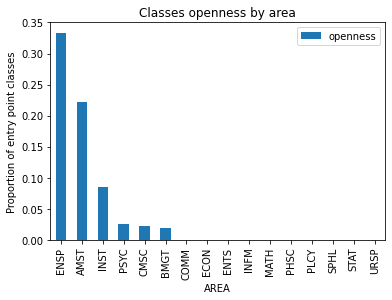

In [57]:
# plot openness by area
entrypoints_by_area.plot(
    x="area", 
    y="openness", 
    kind='bar', 
    xlabel="AREA", 
    ylabel="Proportion of entry point classes",
    title="Classes openness by area"
)

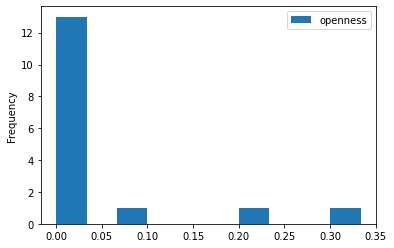

In [59]:
entrypoints_by_area.plot(y="openness", kind="hist")

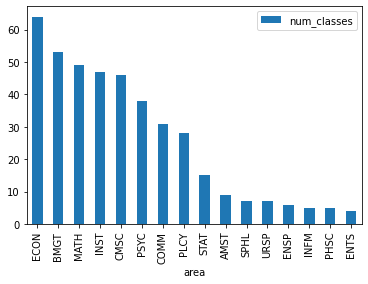

In [67]:
entrypoints_by_area.sort_values(by="num_classes", ascending=False).plot(x="area", y="num_classes", kind="bar")

## Putting it all together: Applications to your project

Let's put this all together, and talk through the problem formulations for your projects

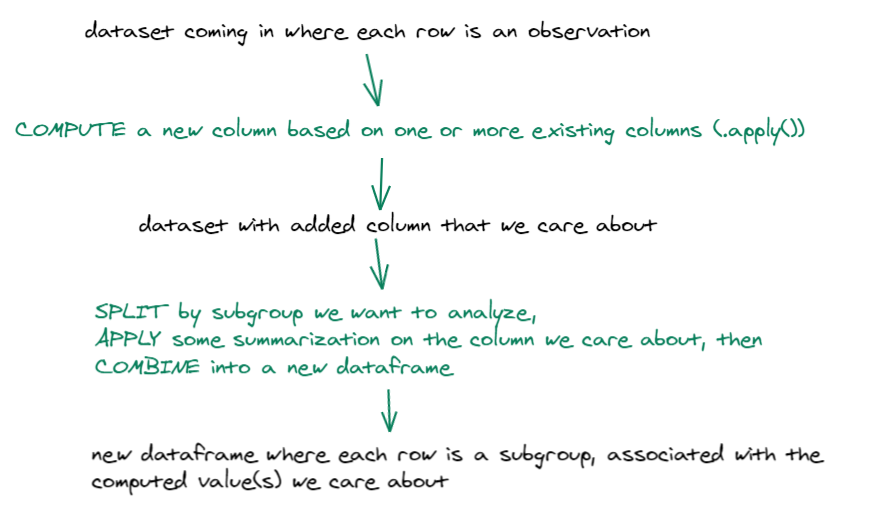

## Reminder: More resources

The pandas website is decent place to start: https://pandas.pydata.org/

This "cheat sheet" is also a really helpful guide to more common operations that you may run into later: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

There are also many blogs that are helpful, like towardsdatascience.com

The cool thing about pandas and data analysis in python is that many people share notebooks that you can inspect / learn from / adapt code for your own projects (just like mine!).